# ETL Process - Data Transformation & Data Enrichment

In [225]:
import pandas as pd
# Read data from .csv file
df = pd.read_csv('/Users/bkhan/switchdrive/2nd semester courses/CIP/scrapings/Homegate scraping/Geneva_listings_src.csv')

In [226]:
# all of our variables are object type
df.dtypes

price      object
size       object
rooms      object
address    object
dtype: object

In [227]:
# Preview top 5 rows using head()
df.head()


,price,size,rooms,address
0,"4,150.–",104m2,2.5rm,"Rue de l'Athénée 38, 1206 Genf"
1,"1,250.–",26m2,1rm,"Rue de la Dôle 15, 1203 Genève"
2,"4,000.–",90m2,2.5rm,"Rue de l'Athénée 36, 1206 Genève"
3,"3,100.–",82m2,4rm,"Rue Liotard, 1202 Geneva"
4,"1,580.–",NaN,2.5rm,"Rue de Lyon, 1201 Genève"


In [228]:
# Lets first understand the basic information about this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    384 non-null    object
 1   size     342 non-null    object
 2   rooms    396 non-null    object
 3   address  405 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


In [229]:
# we have 400 rows and 4 variables
df.shape

(405, 4)

In [230]:

# Convert Column Labels to first letter capital in Dataframe
df.columns = df.columns.str.title()
for col in df.columns:
    print(col)

Price
Size
Rooms
Address


In [231]:
# Renaming columns names
df.rename(columns = {'Price':'Rent','Size':'SurfaceArea','Rooms':'NumRooms'}, inplace = True)
df
 

,Rent,SurfaceArea,NumRooms,Address
0,"4,150.–",104m2,2.5rm,"Rue de l'Athénée 38, 1206 Genf"
1,"1,250.–",26m2,1rm,"Rue de la Dôle 15, 1203 Genève"
2,"4,000.–",90m2,2.5rm,"Rue de l'Athénée 36, 1206 Genève"
3,"3,100.–",82m2,4rm,"Rue Liotard, 1202 Geneva"
4,"1,580.–",NaN,2.5rm,"Rue de Lyon, 1201 Genève"
...,...,...,...,...
400,"3,335.–",88m2,4.5rm,"Chemin De La Chevillarde 44, 1208 Ginevra"
401,"4,160.–",NaN,5rm,"Avenue du Bouchet 20A, 1209 Le Grand-Saconnex"
402,"1,600.–",32m2,2rm,"Rue Benjamin-Soullier 5, 1202 Genf"
403,750.–,15m2,NaN,"Promenade de l'Europe, 1203 Genf"


In [232]:
#Checking rent column
df.iloc[:,1]

0      104m2
1       26m2
2       90m2
3       82m2
4        NaN
       ...  
400     88m2
401      NaN
402     32m2
403     15m2
404      NaN
Name: SurfaceArea, Length: 405, dtype: object

In [233]:
## cannot-convert-string-to-float cause of (.–)&(,) character, therefore applied following:
#converting to float
df['Rent'] = df['Rent'].replace('.–','',regex=True).replace(',','',regex=True).astype(str)
df['Rent']=df['Rent'].astype(float)
df['Rent'].dtypes



                       

dtype('float64')

In [234]:
# Removing m2 from size column, converting to float
df['SurfaceArea'] = df['SurfaceArea'].replace('m2','',regex=True).astype(str)
df['SurfaceArea']=df['SurfaceArea'].astype(float)
df['SurfaceArea']

0      104.0
1       26.0
2       90.0
3       82.0
4        NaN
       ...  
400     88.0
401      NaN
402     32.0
403     15.0
404      NaN
Name: SurfaceArea, Length: 405, dtype: float64

In [235]:
# Converted to float
df['NumRooms']=df['NumRooms'].replace('rm','',regex=True).astype(str)
df['NumRooms']=df['NumRooms'].astype(float)
df['NumRooms']

0      2.5
1      1.0
2      2.5
3      4.0
4      2.5
      ... 
400    4.5
401    5.0
402    2.0
403    NaN
404    NaN
Name: NumRooms, Length: 405, dtype: float64

In [236]:
# Genf and Genève german and french,spanish translation we replace with Geneva english one
df['Address']=df['Address'].str.replace('Genf','Geneva').str.replace('Genève','Geneva').str.replace('Geneve','Geneva').str.replace('Ginevra','Geneva')
df['Address']

        

0                   Rue de l'Athénée 38, 1206 Geneva
1                     Rue de la Dôle 15, 1203 Geneva
2                   Rue de l'Athénée 36, 1206 Geneva
3                           Rue Liotard, 1202 Geneva
4                           Rue de Lyon, 1201 Geneva
                           ...                      
400         Chemin De La Chevillarde 44, 1208 Geneva
401    Avenue du Bouchet 20A, 1209 Le Grand-Saconnex
402             Rue Benjamin-Soullier 5, 1202 Geneva
403               Promenade de l'Europe, 1203 Geneva
404                   76 Rue Montchoisy, 1207 Geneva
Name: Address, Length: 405, dtype: object

In [237]:
# checking missing values, we do observe Rent,SurfaceArea and NumRooms contain NAs

df.isnull()
df.isnull().sum()

Rent           21
SurfaceArea    63
NumRooms        9
Address         0
dtype: int64

In [238]:
# We drop the missing values and NaNs in rows.
df.dropna(subset=['Rent','SurfaceArea','NumRooms'],inplace=True)

# Exploratory data analysis & Data Enrichment

## Adding new features

In [239]:
# I create new columns, rent price per m2, per room and last not least AreaPerRoom to check room size of Apts propoed
# price per room and price per surface area
df['RentPerArea'] = df['Rent'] / df['SurfaceArea']
df['RentPerRoom'] = df['Rent'] / df['NumRooms']
df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']

<AxesSubplot:>

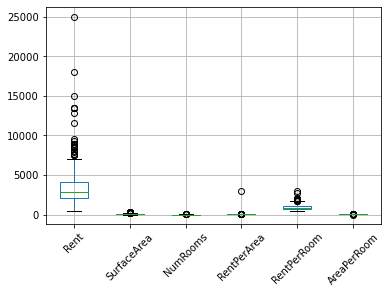

In [240]:
# making boxplot, median rent price is around 2'500 CHF
from matplotlib import pyplot as plt
df.boxplot(rot = 45)

In [241]:
# Creating function to explore outliers
# Calculating quartile 1, 2 and the interquartile range

def get_whiskers(df, col, WHIS):
    des = df.describe()
    q1 = des[col]['25%']
    q3 = des[col]['75%']
    iqr = q3 - q1
    return [q1 - WHIS * iqr, q3 + WHIS * iqr]

<AxesSubplot:>

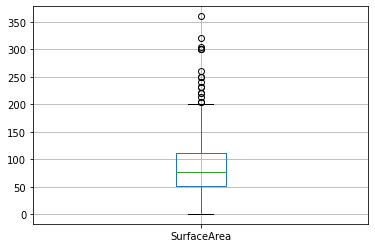

In [242]:
## Surface Area outliers
df[['SurfaceArea']].boxplot()

In [243]:
# WHIS value is adjusted based on the manual study of the outliers
area_whiskers = get_whiskers(df, 'SurfaceArea', WHIS=3.5)  
area_whiskers

[-159.875, 322.125]

In [244]:
# how many area outliers?
area_outliers = (df['SurfaceArea'] > area_whiskers[1]) | (df['SurfaceArea'] < area_whiskers[0])
area_outliers.sum() 

1

In [245]:
df[area_outliers]

,Rent,SurfaceArea,NumRooms,Address,RentPerArea,RentPerRoom,AreaPerRoom
308,25000.0,360.0,9.0,"Florissant, 1206 Geneva",69.444444,2777.777778,40.0


## Rent per Area Outliers:

In [246]:
# it seems that having a price greater than 61CHF is not unusual for rooms for example.
rentPerArea_whiskers = get_whiskers(df, 'RentPerArea', WHIS=1.5)
rentPerArea_whiskers

[17.774390243902438, 61.33536585365854]

In [247]:
rentPerArea_outliers = (df['RentPerArea'] > rentPerArea_whiskers[1]) | (df['RentPerArea'] < rentPerArea_whiskers[0])
print(rentPerArea_outliers.sum())
df[rentPerArea_outliers].head()

19


,Rent,SurfaceArea,NumRooms,Address,RentPerArea,RentPerRoom,AreaPerRoom
22,1520.0,23.0,1.5,"Rue de la Coulouvrenière 40, 1204 Geneva",66.086957,1013.333333,15.333333
32,1910.0,22.0,1.0,"Rue des Vollandes 75, 1207 GENEVE",86.818182,1910.000000,22.000000
44,1200.0,16.0,1.0,"Place Cornavin 14, 1201 Geneva",75.000000,1200.000000,16.000000
50,1440.0,21.0,1.0,"Rue Pradier, 1201 Geneva",68.571429,1440.000000,21.000000
79,1730.0,26.0,1.0,"Rue de la Servette 78, 1202 Geneva",66.538462,1730.000000,26.000000


In [248]:
# Remove Rent per Area outliers to get proper statistical analysis of rent (especially mean)
df = df.drop(df[rentPerArea_outliers].index).reset_index()

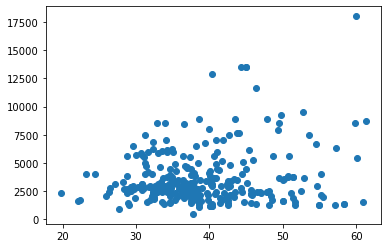

In [249]:
# Plotting, majority gathered on price range 30-40CHF per m2, rental price of 2'500 CHF
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [250]:
## Some statistical info
stats = df.describe()
stats

,index,Rent,SurfaceArea,NumRooms,RentPerArea,RentPerRoom,AreaPerRoom
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,196.552189,3622.158249,94.178451,3.983165,39.125928,895.497539,22.935586
std,117.288243,2384.066720,56.605186,1.694004,7.677983,297.304101,6.080549
min,0.000000,491.000000,13.000000,1.000000,19.831933,413.750000,13.000000
25%,97.000000,2160.000000,55.000000,3.000000,33.611111,697.000000,18.333333
50%,195.000000,2900.000000,80.000000,4.000000,37.972973,812.727273,22.000000
75%,295.000000,4170.000000,114.000000,5.000000,43.333333,1032.333333,26.000000
max,402.000000,18000.000000,320.000000,10.000000,61.267606,2150.000000,57.000000


In [251]:
stats['Rent']['mean']

3622.158249158249

In [252]:
# The mean rental price in Geneva is 3622 (3622.16) CHF per month.
# The mean rental price per room in Geneva is 895.50 CHF per month.
# The mean rental price per square meter in Geneva is 39.13 CHF per month.
stats.Rent

count      297.000000
mean      3622.158249
std       2384.066720
min        491.000000
25%       2160.000000
50%       2900.000000
75%       4170.000000
max      18000.000000
Name: Rent, dtype: float64

# Rent and Zip Code

## Extract Zip Code from Address

In [253]:
#Function for extration ZipCode from Adress column

def Extract_zip_code(address):
    n = len(address)
    l = len("Geneva")
    return int(address[-l - 5: - l -1])

In [254]:
for i in range(0, df.shape[0]):
    address = df['Address'][i]
    Extract_zip_code(address)

In [255]:

df['ZipCode'] = df['Address'].map(lambda x: Extract_zip_code(x))

In [256]:
city = list()

for item in df['Address']:
    city = item.split()[-1]
    city.join(city)

df['City'] = city


In [282]:
df.groupby('NumRooms').ZipCode.value_counts()

NumRooms  ZipCode
1.0       1201       4
          1208       3
          1203       2
          1202       1
          1204       1
                    ..
7.5       1206       1
8.0       1206       2
9.0       1207       2
10.0      1206       2
          1205       1
Name: ZipCode, Length: 93, dtype: int64

In [258]:
df.head().style.hide_index()

index,Rent,SurfaceArea,NumRooms,Address,RentPerArea,RentPerRoom,AreaPerRoom,ZipCode,City
0,4150.000000,104.000000,2.500000,"Rue de l'Athénée 38, 1206 Geneva",39.903846,1660.000000,41.600000,1206,Geneva
1,1250.000000,26.000000,1.000000,"Rue de la Dôle 15, 1203 Geneva",48.076923,1250.000000,26.000000,1203,Geneva
2,4000.000000,90.000000,2.500000,"Rue de l'Athénée 36, 1206 Geneva",44.444444,1600.000000,36.000000,1206,Geneva
3,3100.000000,82.000000,4.000000,"Rue Liotard, 1202 Geneva",37.804878,775.000000,20.500000,1202,Geneva
6,2280.000000,56.000000,3.000000,"Rue de la Servette 31, 1201 Geneva",40.714286,760.000000,18.666667,1201,Geneva


<AxesSubplot:title={'center':'Number of Advertised apartments based on zip code'}>

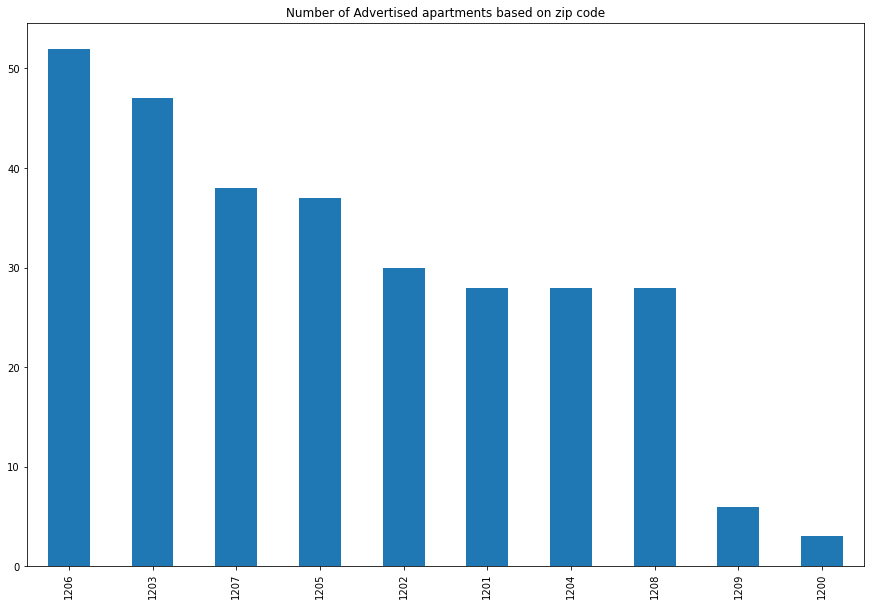

In [259]:
df['ZipCode'].value_counts().plot.bar(figsize=(15,10), title = "Number of Advertised apartments based on zip code")


In [260]:
#Creating df by grouping columns by Zipcode then calculating mean of it
zipVsRentMean = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom', 'SurfaceArea']]\
                .groupby(['ZipCode'], as_index = False).mean()

In [261]:
zipVsRentMean

,ZipCode,RentPerArea,RentPerRoom,AreaPerRoom,SurfaceArea
0,1200,40.787924,899.814815,22.503367,106.666667
1,1201,41.403102,882.109565,21.283923,82.142857
2,1202,37.059230,818.934074,22.243254,85.266667
3,1203,37.527645,716.131490,19.320108,64.234043
4,1204,44.574250,1117.337317,25.277993,88.071429
5,1205,35.181856,698.735049,20.106478,75.918919
6,1206,39.905645,1103.584285,27.531853,143.326923
7,1207,41.646907,904.179500,21.860883,100.052632
8,1208,36.857806,909.245248,24.852548,88.071429
9,1209,37.278602,999.223665,27.183622,129.666667


## Bar Plots

In [264]:
import seaborn as sns

In [265]:
dftmp = df

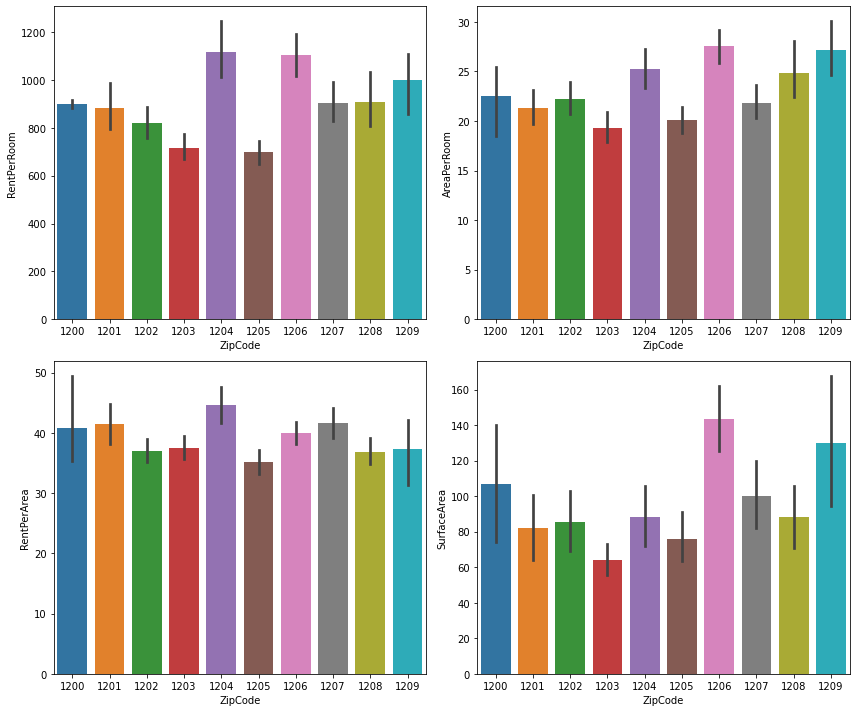

In [266]:

f, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'ZipCode', y = 'RentPerRoom', data = dftmp)
plt.subplot(2, 2, 2)
sns.barplot(x = 'ZipCode', y = 'AreaPerRoom', data = dftmp)
plt.subplot(2, 2, 3)
sns.barplot(x = 'ZipCode', y = 'RentPerArea', data = dftmp)
plt.subplot(2, 2, 4)
sns.barplot(x = 'ZipCode', y = 'SurfaceArea', data = dftmp)
plt.tight_layout()

Text(0.5, 0.98, 'ZipCode Vs RentPerRoom')

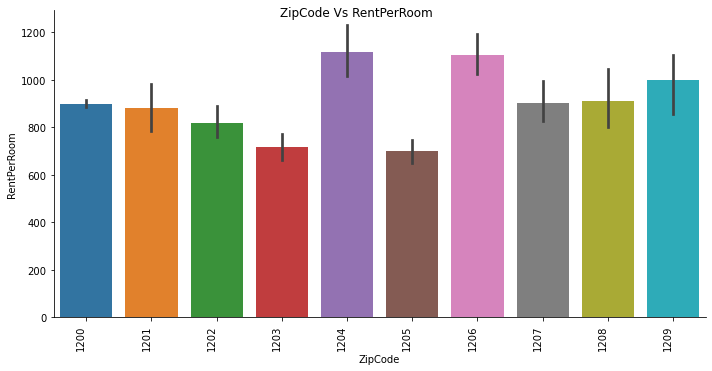

In [267]:
cpsl=sns.catplot(x='ZipCode', y='RentPerRoom', kind ='bar', data= dftmp, aspect=2)
                                    #aspect: increase the width of your graph 
cpsl.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues 
cpsl.fig.suptitle("ZipCode Vs RentPerRoom")

# Showing the results on a map

## Getting the data

First download the zip code data from Swiss opendata(https://opendata.swiss/en/dataset/amtliches-ortschaftenverzeichnis-mit-postleitzahl-und-perimeter)
Downloaded the Shape LV95---PLZO_SHP_LV95.

## Import the data with Geopandas

In [268]:

# I use the shapefile from downloaded folder to create geopandas frame
import geopandas as gpd
#from shapely.geometry import Point, Polygon

gdf = gpd.read_file('/Users/bkhan/switchdrive/2nd semester courses/CIP/scrapings/Homegate scraping/PLZO_SHP_LV95/PLZO_PLZ.shp')

gdf.head(2)


,UUID,OS_UUID,STATUS,INAEND,PLZ,ZUSZIFF,geometry
0,{0072F991-E46D-447E-A3BE-75467DB57FFC},{281807DC-9C0B-4364-9A55-0E8956876194},real,nein,3920,0,"POLYGON ((2610632.099 1092967.881, 2610689.100..."
1,{C3D3316F-1DFE-468E-BFC5-5C2308743B4C},{F065D58C-3F88-46EF-9AA0-DA0A96766333},real,nein,3864,0,"POLYGON ((2651834.366 1155253.396, 2651901.894..."


## Conversion of coordinate reference system (crs)

In [269]:
# I found out from https://geopandas.org/en/latest/docs/user_guide/projections.html
# one of the most commonly used CRS is the WGS84 latitude-longitude projection. 
# This can be referred to using the authority code "EPSG:4326".
gdf= gdf.to_crs({'init': 'epsg:4326'})
gdf.crs

/Users/bkhan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plotting Geneva Area

In [270]:
# Create list of zip codes i have for Geneva
geneva = [1200, 1201, 1202,1203,1204,1205,1206,1207,1208,1209]

In [271]:
# Creating geopandas frame for Geneva with zipcodes in gdf are contained in geneva list.
gdf_gen = gdf[gdf['PLZ'].isin(geneva)]


In [272]:
gdf_gen.head()

,UUID,OS_UUID,STATUS,INAEND,PLZ,ZUSZIFF,geometry
2635,{5BCFFFAB-44EC-4FA9-933B-0EFE6BB05565},{5DF8DDBE-8D41-42A3-8F30-F9E716E39C75},real,nein,1202,0,"POLYGON ((6.16670 46.22447, 6.16593 46.22246, ..."
3370,{54A45D65-97A3-45A1-8DB2-FA3E6E540269},{5DF8DDBE-8D41-42A3-8F30-F9E716E39C75},real,nein,1203,0,"POLYGON ((6.13514 46.20837, 6.13470 46.20798, ..."
3456,{D924C540-1604-4E4A-9C30-A31E36299921},{5DF8DDBE-8D41-42A3-8F30-F9E716E39C75},real,nein,1206,0,"POLYGON ((6.15383 46.17984, 6.15387 46.18019, ..."
3485,{F97E72AA-A260-4075-B3AE-F87FEDE38726},{5DF8DDBE-8D41-42A3-8F30-F9E716E39C75},real,nein,1205,0,"POLYGON ((6.13394 46.20368, 6.13408 46.20308, ..."
3531,{B5EA9714-EF37-41F0-B481-F59A93221892},{5DF8DDBE-8D41-42A3-8F30-F9E716E39C75},real,nein,1207,0,"POLYGON ((6.15741 46.20996, 6.15746 46.21001, ..."


<AxesSubplot:>

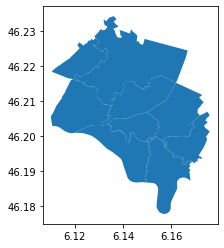

In [273]:
# Poltting Geneva map
gdf_gen.plot()

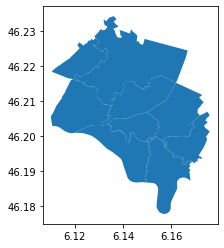

In [274]:
ax = gdf_gen.plot()
fig = ax.get_figure()

In [275]:
# Merge DataFrames gdf_gen and zipVsRentMean with specified left and right suffixes
gdf_gen = gdf_gen.merge(zipVsRentMean, left_on='PLZ', right_on='ZipCode')

## Plotting Choropleth map with Altair
To plot nicer and interactive map i use the altair library. (https://altair-viz.github.io/)

In [276]:
## Longitude and latitude of the centroid of zip-code areas:
gdf_gen['x'] = gdf_gen['geometry'].centroid.x
gdf_gen['y'] = gdf_gen['geometry'].centroid.y

/var/folders/r2/n33bdbqn679ff52k_jnl3y080000gn/T/ipykernel_89701/4137171453.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_gen['x'] = gdf_gen['geometry'].centroid.x
/var/folders/r2/n33bdbqn679ff52k_jnl3y080000gn/T/ipykernel_89701/4137171453.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_gen['y'] = gdf_gen['geometry'].centroid.y


In [277]:
import altair as alt

## Altair currently can only handle geojson or topjson maps. 
## So, first we need to convert the geopandas data to appropriate data readable by altair.

import json
json_gen = json.loads(gdf_gen.to_json())
alt_gen = alt.Data(values = json_gen['features'])


In [278]:
## I add plot settings and configurations
## First I want to see how rent prices per area (per square meter) are distrubuted by Zipcode in my heatmap
## Zipcode 1204 is the most expensize with CHF44 per m2
alt_RentPerArea = alt.Chart(alt_gen).mark_geoshape(
    stroke = 'white'
).encode(
    latitude = 'properties.y:Q',
    longitude = 'properties.x:Q',
    color = 'properties.RentPerArea:Q'
).properties(
    width = 700,
    height = 600
)
text  = alt.Chart(alt_gen).mark_text(
        color = 'black',
        fontWeight = 'bold'
).encode(
    longitude = 'properties.x:Q',
    latitude = 'properties.y:Q',
    text = 'properties.ZipCode:Q',
)
chart = alt_RentPerArea + text
chart

alt.LayerChart(...)

In [279]:
## Now we make heatmap for rent prices per room
## Again Zipcodes 1204 and 1206 are the most expensive for the average rent price of room
alt_rentPerRoom = alt.Chart(alt_gen).mark_geoshape(
    stroke = 'white'
).encode(
    latitude = 'properties.y:Q',
    longitude = 'properties.x:Q',
    color = 'properties.RentPerRoom:Q'
).properties(
    width = 700,
    height = 600
)

text  = alt.Chart(alt_gen).mark_text(
        color = 'black',
        fontWeight = 'bold'
).encode(
    longitude = 'properties.x:Q',
    latitude = 'properties.y:Q',
    text = 'properties.ZipCode:Q',
)
chart = alt_rentPerRoom + text
chart

alt.LayerChart(...)

In [280]:
## Our intention to show distribution of apt regarding the size of rooms in heatmap
## df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']
## We realize the biggest biggest apts for their rooms size are located in ZipCode 1206 and 1209
alt_AreaPerRoom = alt.Chart(alt_gen).mark_geoshape(
    stroke = 'white'
).encode(
    latitude = 'properties.y:Q',
    longitude = 'properties.x:Q',
    color = 'properties.AreaPerRoom:Q'
).properties(
    width = 700,
    height = 600
)

text  = alt.Chart(alt_gen).mark_text(
        color = 'black',
        fontWeight = 'bold'
).encode(
    longitude = 'properties.x:Q',
    latitude = 'properties.y:Q',
    text = 'properties.ZipCode:Q',
)
chart = alt_AreaPerRoom + text
chart

alt.LayerChart(...)

In [281]:
#export DataFrame to CSV file
df.to_csv(r'/Users/bkhan/switchdrive/2nd semester courses/CIP/scrapings/Homegate scraping/Homegate_stage.csv', index=False)